In [15]:
import numpy as np
import matplotlib.pyplot as plt
import png
from tqdm import tqdm
from datetime import datetime
import adbin
import imp
imp.reload(adbin)

<module 'adbin' from '/home/vova/Desktop/diploma/polygon/adbin.py'>

Как брать окрестность у пикселей на границе изображения?
- ~~Дополнять область за границей фиксированным цветом (белым или чёрным).~~
- Окрестность строго внутри исходного изображения, пусть точка будет не в центре.

In [2]:
SURFACE_TYPES = ["Rough surface", "White surface", "White + Contrast", "Contrast surface"]
LIGHT_TYPES = ["Good light", "Low light", "Shadow", "Half light"]
ITERATION_FIELD = [(i, j, k) for k in range(2) for j in range(4) for i in range(4)]

def show_all(imgs):
    plt.figure(figsize=(24, 16))
    for i in range(4):
        for j in range(4):
            for k in range(2):
                plt.subplot(4, 8, 8*i + 2*j + k + 1)
                plt.xticks([])
                plt.yticks([])
                if i == 0 and k == 0:
                    plt.title(LIGHT_TYPES[j], fontsize=16)
                if j == 0 and k == 0:
                    plt.ylabel(SURFACE_TYPES[i], fontsize=16)
                plt.imshow(imgs[i][j][k].astype("uint8"), "gray")

    plt.show()
    
def save_all(imgs, path_prefix="./"):
    for i, j, k in ITERATION_FIELD:
        png.from_array(imgs[i][j][k], mode="L").save(f"{path_prefix}{i+1}_{j+1} ({k+1}).png")

def save_img(img, i, j, k, path_prefix="./"):
    filepath = f"{path_prefix}{i+1}_{j+1} ({k+1}).png"
#     with open(filepath, "wb") as file:
#         w = png.Writer(IMG_W, IMG_H, greyscale=True)
#         w.write(file, img)
    png.from_array(img, mode="L").save(filepath)

def get_img(filepath):
    # Input is a grayscale image in RGB mode.
    # ffmpeg -i INPUT.png -vf hue=s=o OUTPUT.png
    with open(filepath, "rb") as file:
        r = png.Reader(file=file)
        pnginfo = r.read()
        img_w = pnginfo[0]
        img_h = pnginfo[1]
        pngdata = list(pnginfo[2])
    return img_w, img_h, np.array([[row[i] for i in range(0, len(row), 3)] for row in pngdata], dtype=np.uint8)

## Original images (grayscale)

In [3]:
images = [[[] for j in range(4)] for i in range(4)]
for i in range(4):
    for j in range(4):
        for k in range(2):
            img_w, img_h, img = get_img(f"img_grayscale/{i+1}_{j+1} ({k+1}).png")
            images[i][j].append(img)

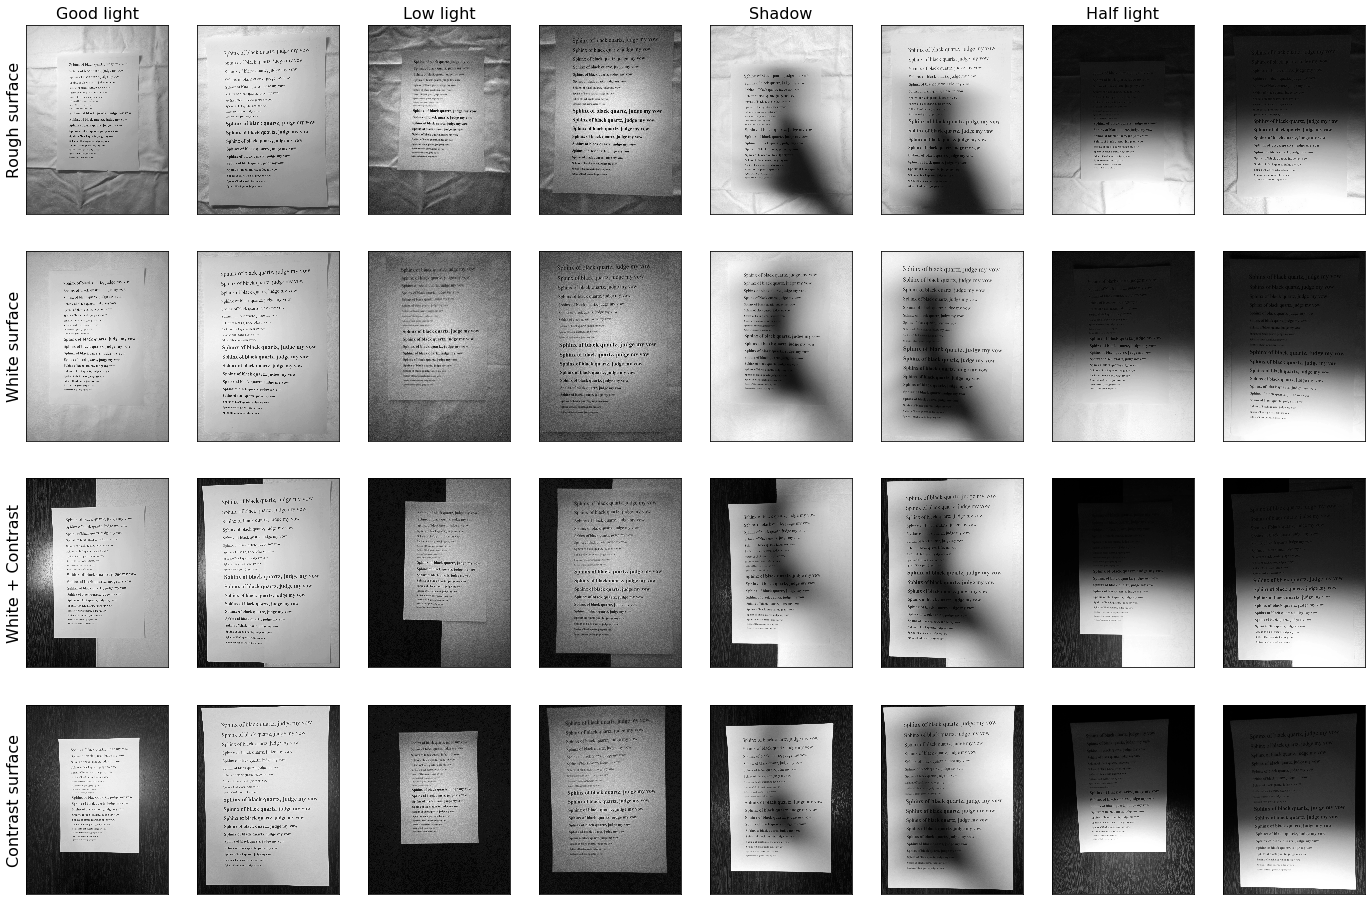

In [4]:
show_all(images)

In [5]:
print(img_w, 'x', img_h)
images[-1][-1][-1]

1200 x 1600


array([[ 1,  1,  1, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  0,  0,  0],
       ...,
       [62, 56, 61, ..., 90, 68, 40],
       [61, 64, 66, ..., 91, 68, 45],
       [63, 63, 58, ..., 90, 61, 35]], dtype=uint8)

## Niblack's technique

In [6]:
imgs_Niblack = [[[] for j in range(4)] for i in range(4)]
tmst_Niblack = []
for i, j, k in tqdm(ITERATION_FIELD):
    tmst = datetime.now(tz=None)
    imgs_Niblack[i][j].append(adbin.adbin_Niblack(images[i][j][k]))
    tmst = datetime.now(tz=None) - tmst
    tmst_Niblack.append(tmst.seconds + (tmst.microseconds // 1000) / 1000)
    save_img(imgs_Niblack[i][j][-1], i, j, k, "./img_Niblack_W15_C10/")

100%|██████████| 32/32 [38:59<00:00, 73.11s/it]


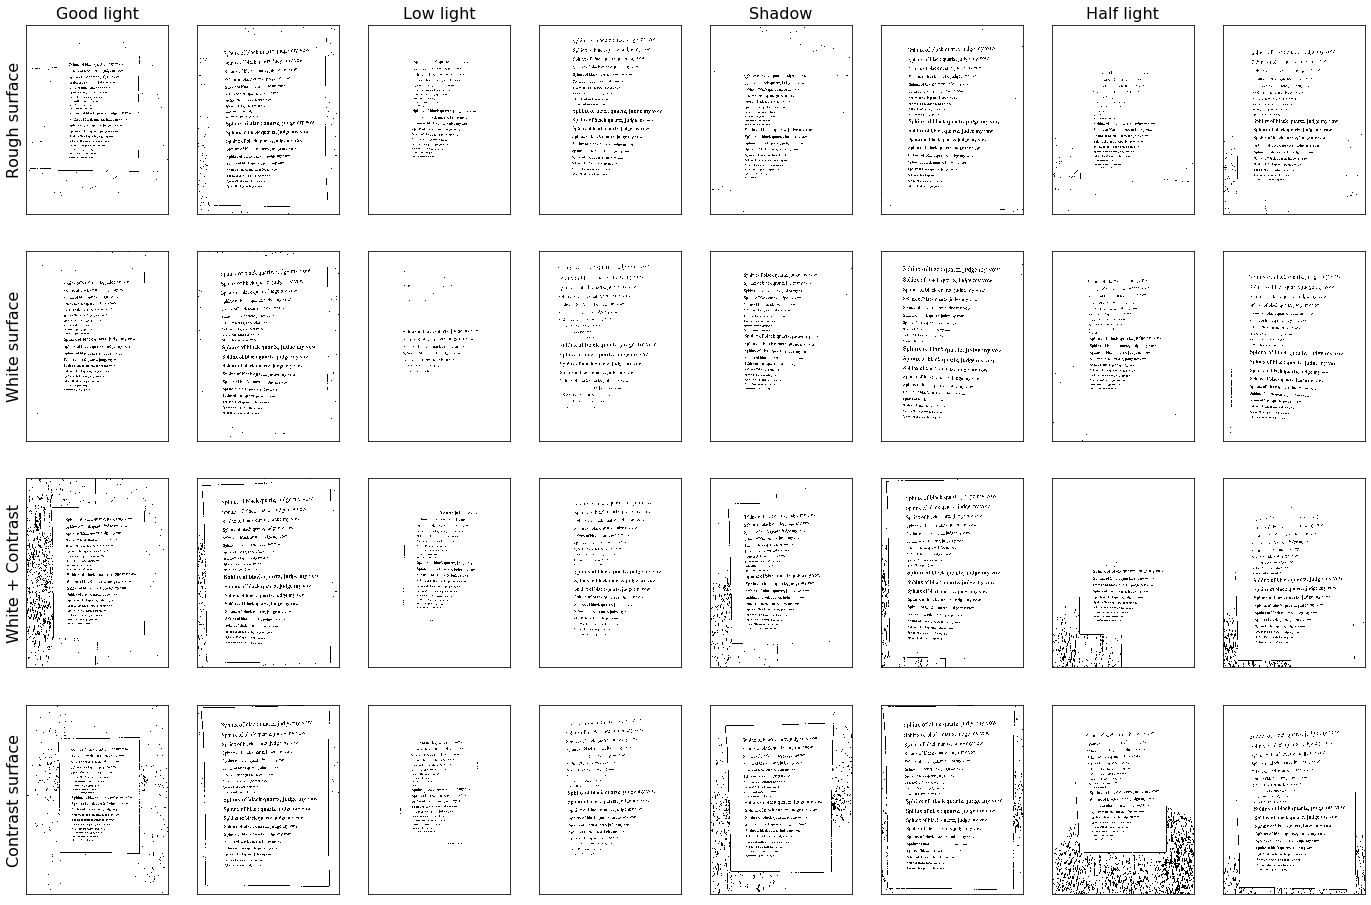

In [7]:
show_all(imgs_Niblack)

## Adaptive mean technique

In [8]:
imgs_mean = [[[] for j in range(4)] for i in range(4)]
tmst_mean = []
for i, j, k in tqdm(ITERATION_FIELD):
    tmst = datetime.now(tz=None)
    imgs_mean[i][j].append(adbin.adbin_mean(images[i][j][k]))
    tmst = datetime.now(tz=None) - tmst
    tmst_mean.append(tmst.seconds + (tmst.microseconds // 1000) / 1000)
    save_img(imgs_mean[i][j][-1], i, j, k, "./img_mean_W15_C11/")

100%|██████████| 32/32 [12:04<00:00, 22.63s/it]


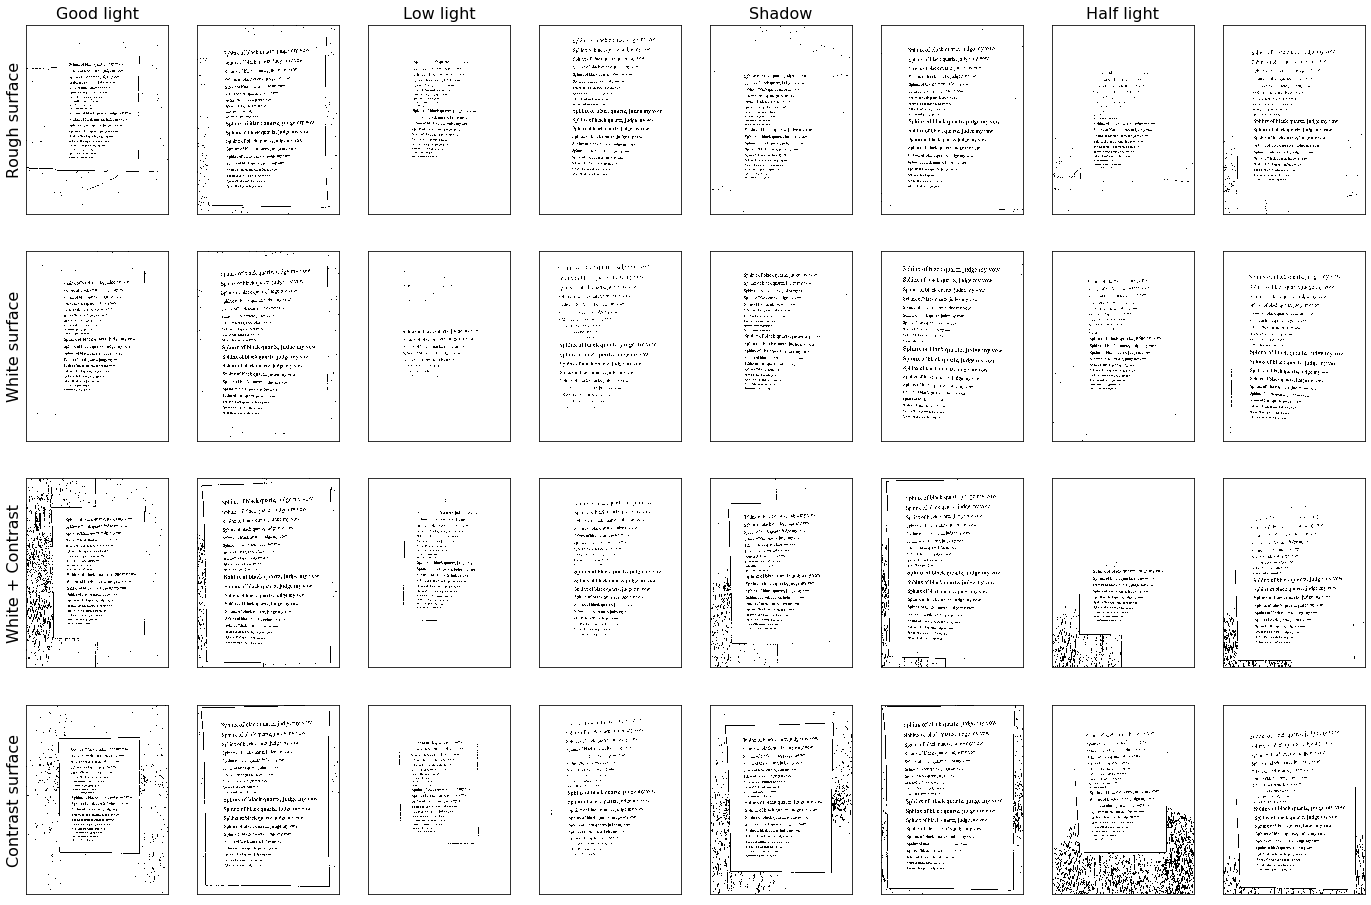

In [9]:
show_all(imgs_mean)

## Sauvola's technique

In [10]:
imgs_Sauvola= [[[] for j in range(4)] for i in range(4)]
tmst_Sauvola = []
for i, j, k in tqdm(ITERATION_FIELD):
    tmst = datetime.now(tz=None)
    imgs_Sauvola[i][j].append(adbin.adbin_Sauvola(images[i][j][k]))
    tmst = datetime.now(tz=None) - tmst
    tmst_Sauvola.append(tmst.seconds + (tmst.microseconds // 1000) / 1000)
    save_img(imgs_Sauvola[i][j][-1], i, j, k, "./img_Sauvola_W15_k035/")

100%|██████████| 32/32 [39:29<00:00, 74.05s/it]


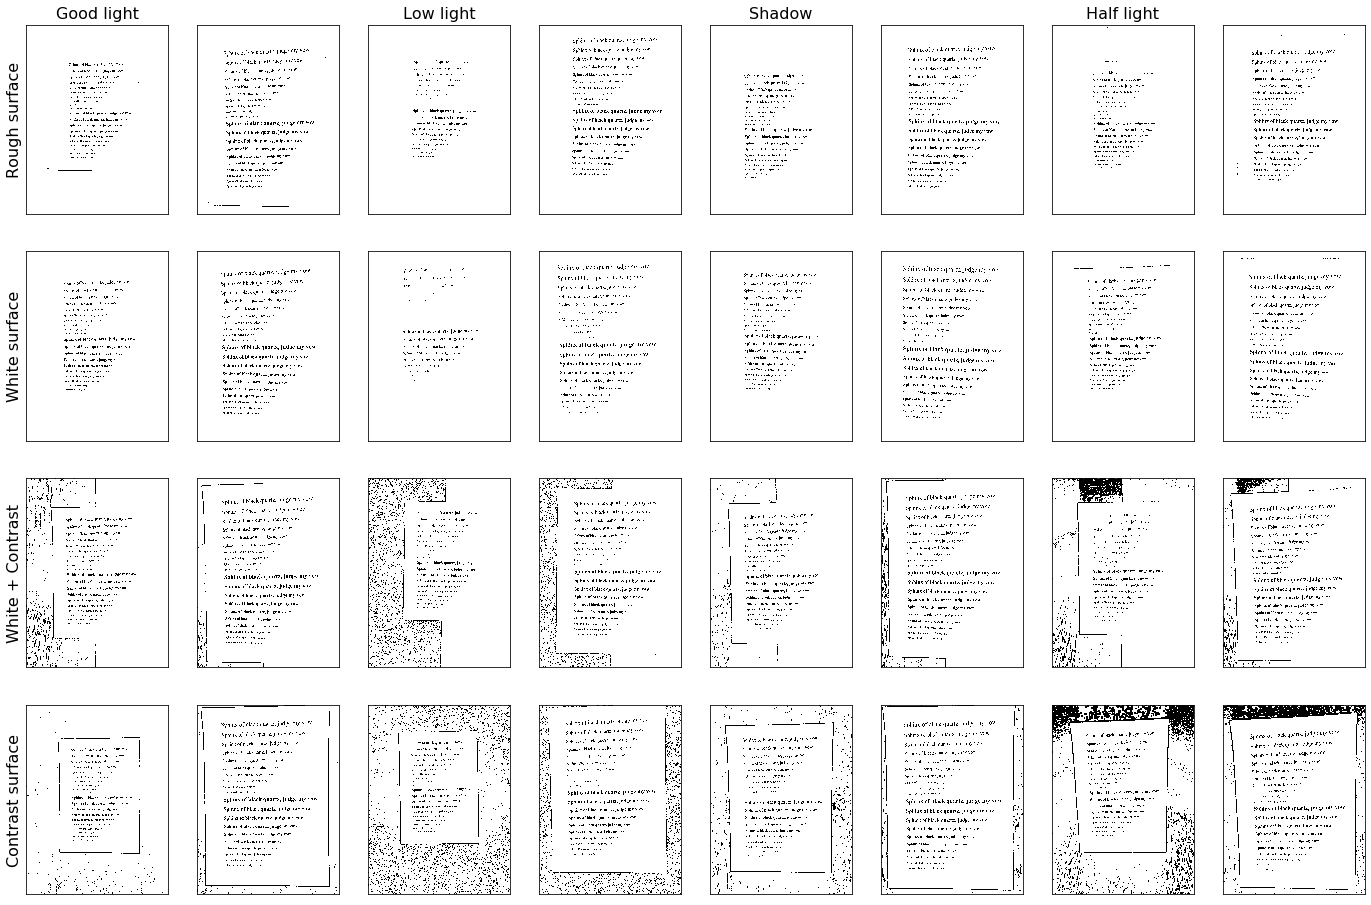

In [11]:
show_all(imgs_Sauvola)

## T.R.Singh's technique

In [12]:
imgs_TRSingh = [[[] for j in range(4)] for i in range(4)]
tmst_TRSingh = []
for i, j, k in tqdm(ITERATION_FIELD):
    tmst = datetime.now(tz=None)
    imgs_TRSingh[i][j].append(adbin.adbin_TRSingh(images[i][j][k]))
    tmst = datetime.now(tz=None) - tmst
    tmst_TRSingh.append(tmst.seconds + (tmst.microseconds // 1000) / 1000)
    save_img(imgs_TRSingh[i][j][-1], i, j, k, "./img_TRSingh_W15_k035/")

100%|██████████| 32/32 [13:49<00:00, 25.92s/it]


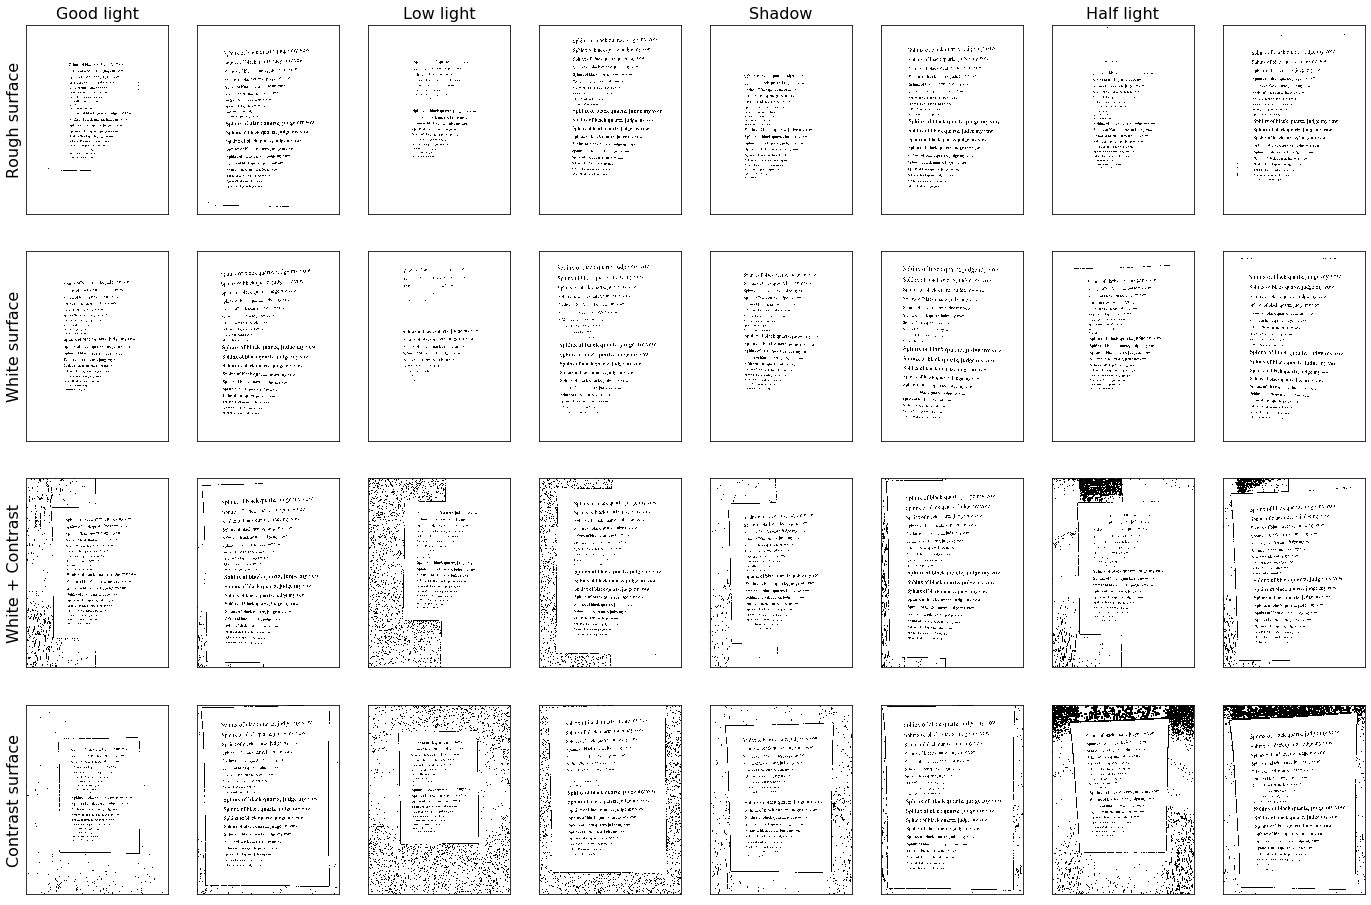

In [13]:
show_all(imgs_TRSingh)

## Local Adaptive Automatic Binarization (LAAB)

In [16]:
imgs_LAAB = [[[] for j in range(4)] for i in range(4)]
tmst_LAAB = []
for i, j, k in tqdm(ITERATION_FIELD):
    tmst = datetime.now(tz=None)
    imgs_LAAB[i][j].append(adbin.adbin_LAAB(images[i][j][k]))
    tmst = datetime.now(tz=None) - tmst
    tmst_LAAB.append(tmst.seconds + (tmst.microseconds // 1000) / 1000)
    save_img(imgs_LAAB[i][j][-1], i, j, k, "./img_LAAB_W15_k055/")

100%|██████████| 32/32 [07:31<00:00, 14.10s/it]


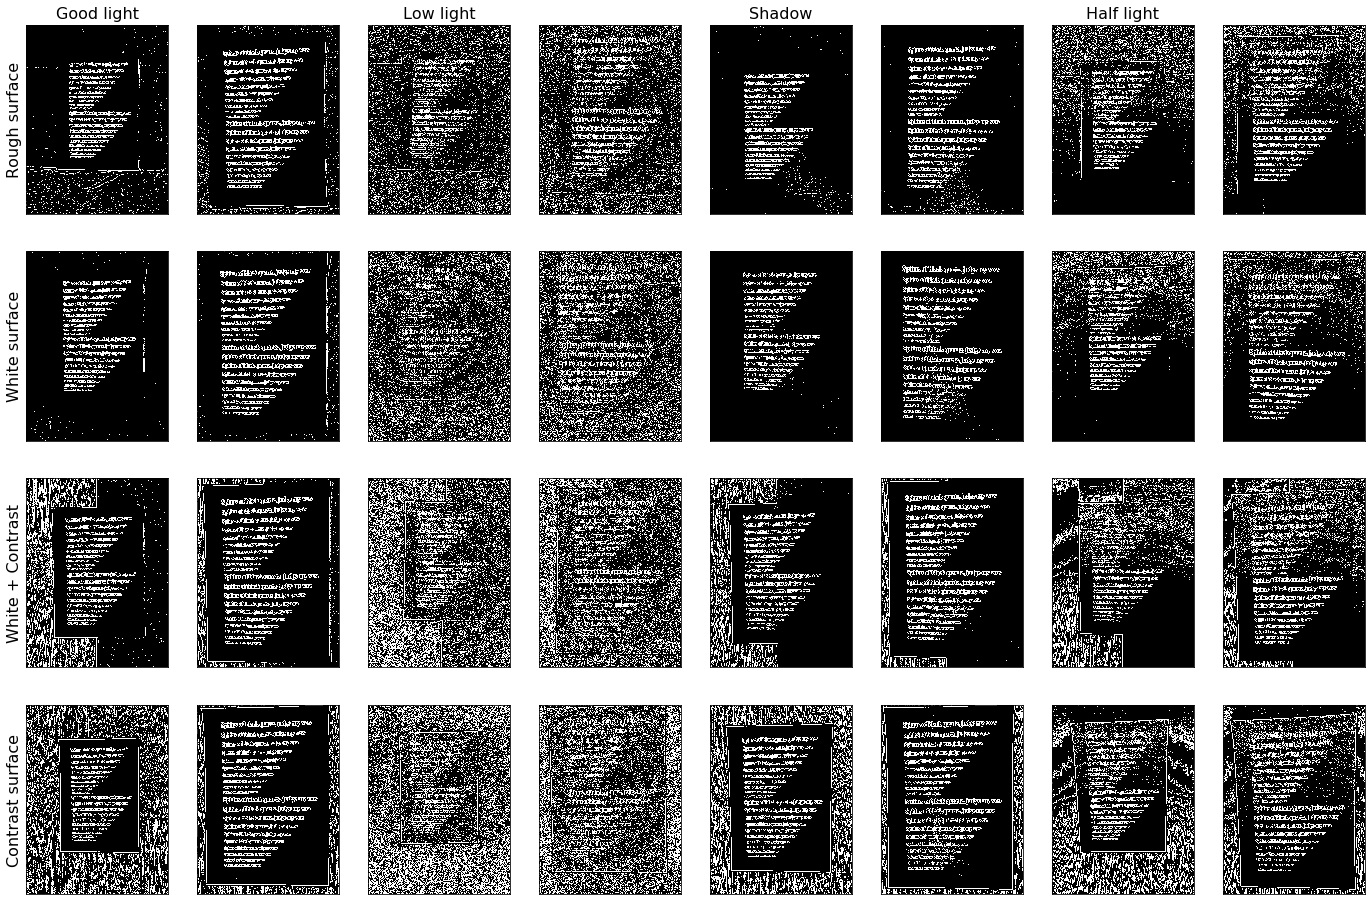

In [17]:
show_all(imgs_LAAB)

## Bernsen's technique

In [18]:
imgs_Bernsen = [[[] for j in range(4)] for i in range(4)]
tmst_Bernsen = []
for i, j, k in tqdm(ITERATION_FIELD):
    tmst = datetime.now(tz=None)
    imgs_Bernsen[i][j].append(adbin.adbin_Bernsen(images[i][j][k]))
    tmst = datetime.now(tz=None) - tmst
    tmst_Bernsen.append(tmst.seconds + (tmst.microseconds // 1000) / 1000)
    save_img(imgs_Bernsen[i][j][-1], i, j, k, "./img_Bernsen_W31_L15/")

100%|██████████| 32/32 [19:42<00:00, 36.94s/it]


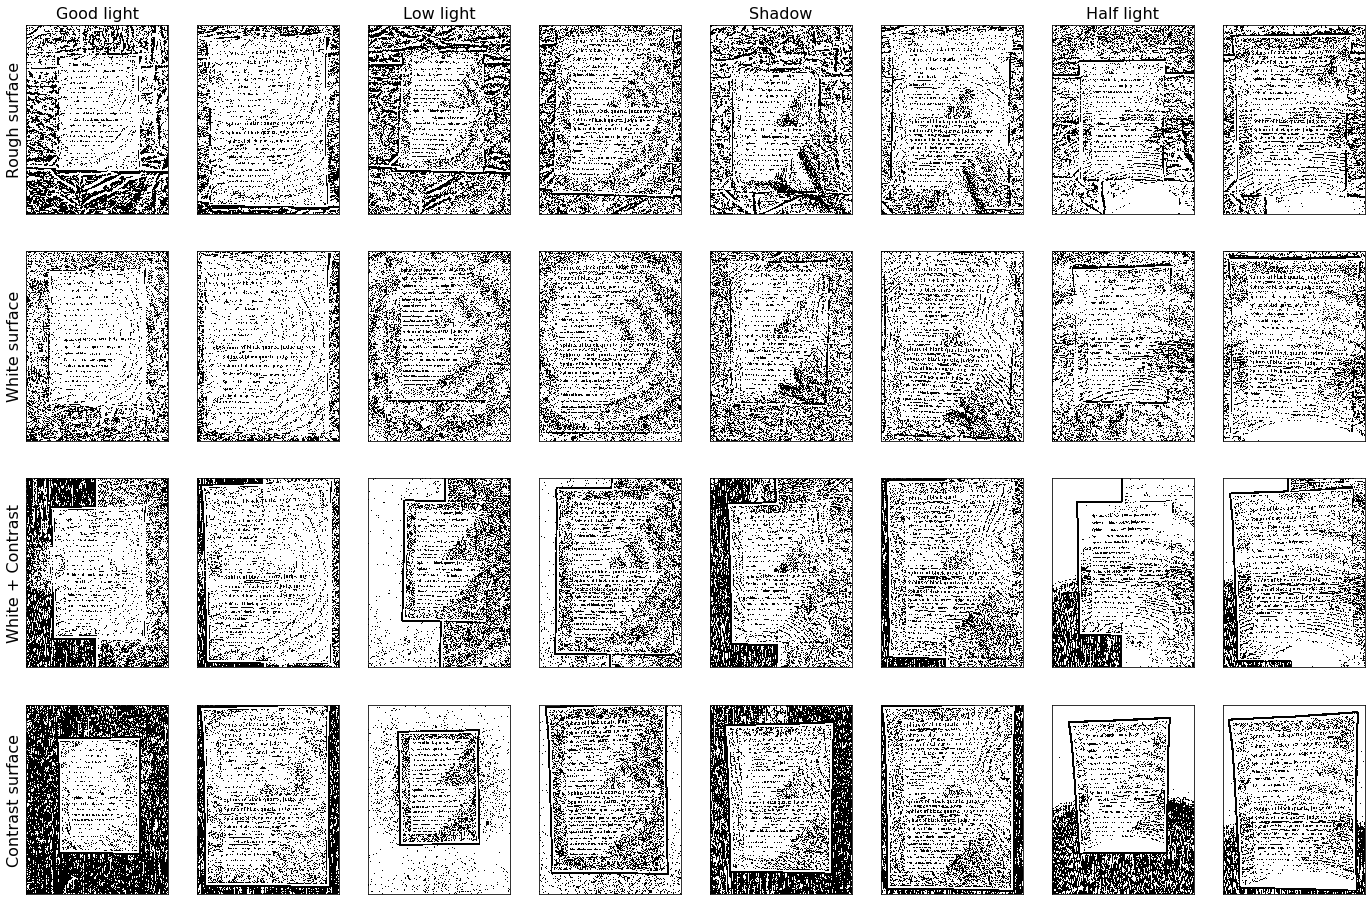

In [19]:
show_all(imgs_Bernsen)

## O.I.Singh's technique

In [20]:
imgs_OISingh = [[[] for j in range(4)] for i in range(4)]
tmst_OISingh = []
for i, j, k in tqdm(ITERATION_FIELD):
    tmst = datetime.now(tz=None)
    imgs_OISingh[i][j].append(adbin.adbin_OISingh(images[i][j][k]))
    tmst = datetime.now(tz=None) - tmst
    tmst_OISingh.append(tmst.seconds + (tmst.microseconds // 1000) / 1000)
    save_img(imgs_OISingh[i][j][-1], i, j, k, "./img_OISingh_W15_k07/")

100%|██████████| 32/32 [24:14<00:00, 45.44s/it]


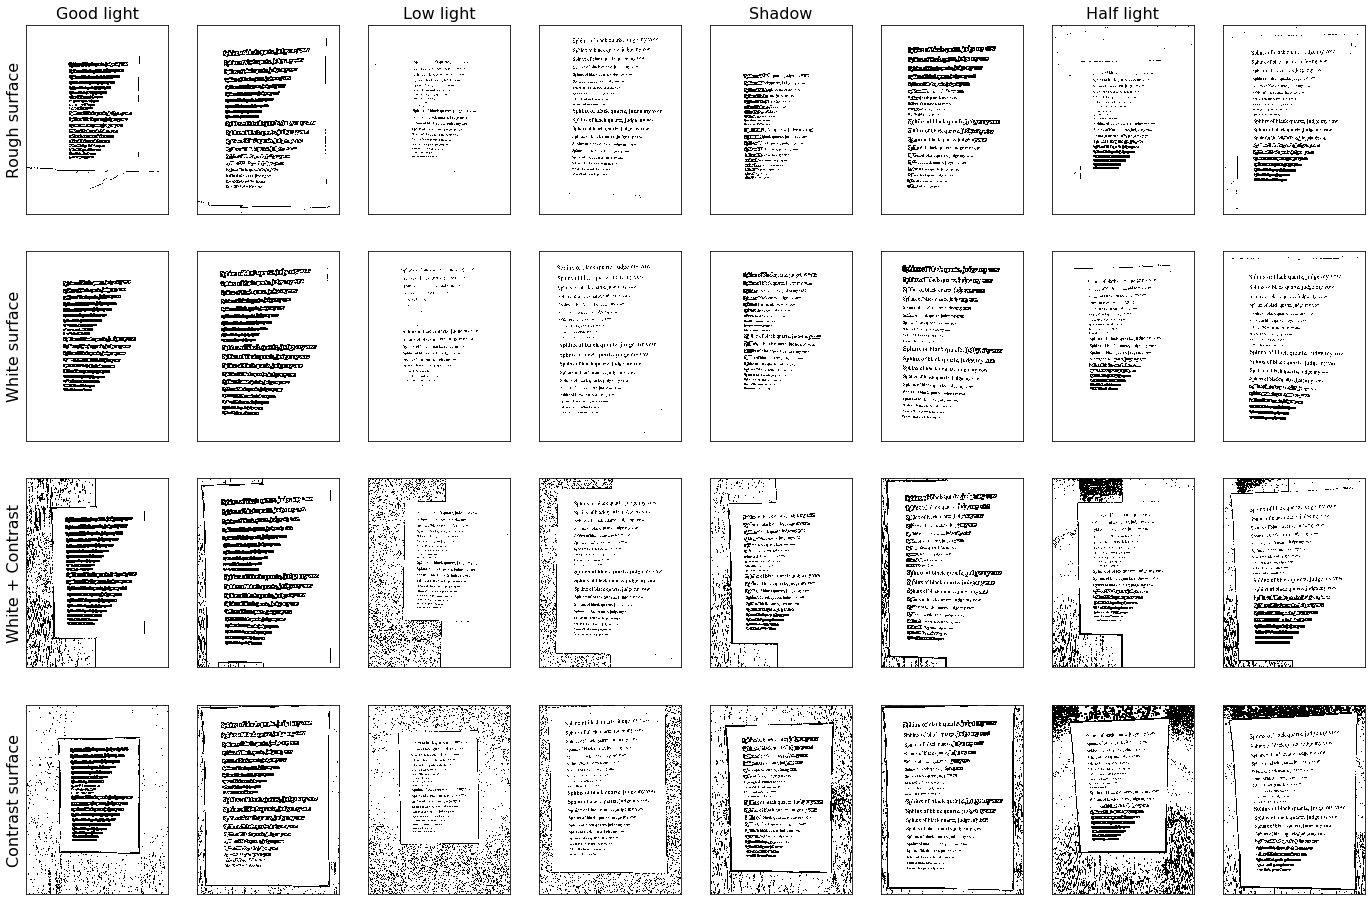

In [21]:
show_all(imgs_OISingh)